# Logistic Regression


In this notebook you will learn:
2. How to train a logistic regression model
3. How to evaluate the performance of a classification model your model
4. How to interpret a Logistic Regression's weights
5. How to visualize its decision boundaries in 2D


## Why Logistic Regression

1. Simple model
2. Good interpretation of the coefficients
3. Computationally efficient
4. Low risk of overfitting
5. Great baseline model for classification

# Imports

In [ ]:
%pip install matplotlib

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import plot_decision_boundary

# Load the data

In [7]:
# Load the iris dataset from scikit-learn
iris = load_iris()

# Create a DataFrame from the features and target variable
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
df['target'] = [ iris['target_names'][i] for i in iris['target']]

In [8]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
df.shape

(150, 5)

## Documentation about the data

In [9]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

# Let's keep it simple

There are 3 types of plants but we just want to classify if a given plant is `Iris-Setosa` or `Iris-Versicolour`. So let's remove data related to `Iris-Virginica`.

In [10]:
# removing rows associated with the plant we are not interested in
df_preprocessed = df[df.target != 'virginica']

In [11]:
df_preprocessed.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [12]:
df_preprocessed.shape

(100, 5)

# Train a model

1st we have to decide what will be our positive class (1) and what will be our negative class (0)

- **Positive class**: Iris-Setosa
- **Negative class**: Iris-Versicolour

Now for the model to understand these targets we have to actually encode them as either 0 or 1:

In [13]:
df_preprocessed.loc[:,'target'] = df_preprocessed['target'].replace({'setosa':1.0,'versicolor':0.0})

In [14]:
df_preprocessed.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,1.0
1,4.9,3.0,1.4,0.2,1.0
2,4.7,3.2,1.3,0.2,1.0


Awesome! We are ready to train a Logistic Regression

In [15]:
X = df_preprocessed[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df_preprocessed['target'].astype(float)

In [18]:
model = LogisticRegression()

model.fit(X,y)

LogisticRegression()

In [19]:
preds = model.predict(X)
preds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

![](../media/7ysypz.jpg)

And you would be right! model.predict here is actually doing a couple of steps under the hood:

First it outputs the probabilities by passing the inputs through the **sigmoid** function

In [21]:
probas = model.predict_proba(X)[:,1]
probas

array([0.98394926, 0.9770318 , 0.98594642, 0.97685061, 0.98594404,
       0.96957176, 0.98446607, 0.97892381, 0.9797649 , 0.97602528,
       0.98081498, 0.97576758, 0.97997759, 0.99186498, 0.99118763,
       0.9858607 , 0.98768908, 0.9823565 , 0.96560719, 0.98305726,
       0.96085176, 0.97964569, 0.99527474, 0.95041352, 0.95270877,
       0.96248122, 0.96816988, 0.97897787, 0.98167666, 0.97229849,
       0.9684292 , 0.96981319, 0.98880851, 0.98979431, 0.97366724,
       0.98725092, 0.98479072, 0.98776111, 0.98524692, 0.97799583,
       0.98653989, 0.96851625, 0.98766416, 0.96487976, 0.95440094,
       0.97583085, 0.98066305, 0.98310854, 0.98162631, 0.9816294 ,
       0.00312313, 0.00584616, 0.00170858, 0.01463874, 0.00309835,
       0.006705  , 0.00383667, 0.12457776, 0.00393205, 0.02712437,
       0.0563433 , 0.01207142, 0.01432221, 0.00353481, 0.05809666,
       0.00648452, 0.00692816, 0.01943963, 0.00258613, 0.02536569,
       0.00273968, 0.01763509, 0.0012919 , 0.003912  , 0.00854

Then it makes a decision about what class this probability falls into by placing a decision threshold:

In [24]:
(probas > decision_threshold)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [23]:
decision_threshold = 0.5 # default
preds = (probas > decision_threshold).astype(float)

In [25]:
preds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

----

So, is our model correct?

In [26]:
accuracy = (preds == y).sum() / len(y)

In [27]:
accuracy

1.0

![](../media/7yusqp.jpg)

# Visualizing the model

/Users/simaonovais/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


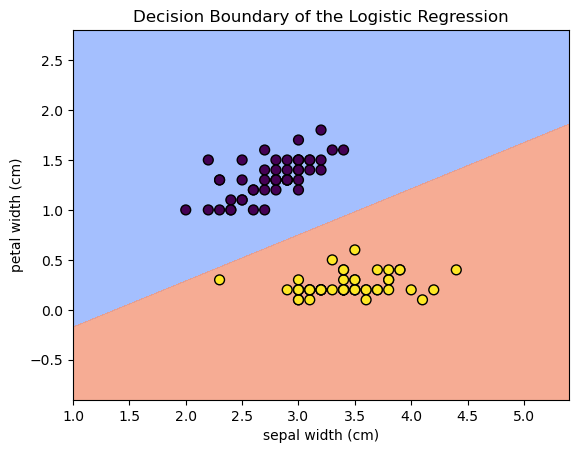

In [28]:
plot_decision_boundary(feature_a = X['sepal width (cm)'],
                       feature_b = X['petal width (cm)'],
                       target = y, 
                       threshold = 0.5)

# Can we interpret a Logistic Regression Model?

We know how to compute the probabilities for any given example: 

$$ p = \frac{1}{1 + e^{-(\beta_0 x_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 +b)}}$$


But remind that:

$$ 
\begin{equation}\begin{aligned}\beta_0 x_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 +b &= \log \frac{p}{1-p} \\
&= \log odds \end{aligned} \end{equation}$$

This means that the log odds is linear on the model parameters $\beta_i$. As such, like in Linear Regression, each $\beta_i$ each represents the change in $\log odds$  for a unit change in $x_i$.

In [30]:
X.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [29]:
model.coef_

array([[-0.44036482,  0.90696813, -2.30849566, -0.96232763]])

These coeficients help us understand how the model is making its decisions. For our case:
1. a unit change in `sepal length` makes it more likely to be **iris-versicolor**
2. a unit change in `sepal width` makes it more likely to be **iris-setosa**
3. a unit change in `petal length` makes it a lot more likely to be **iris-versicolor**
4. a unit change in `petal width` makes it more likely to be **iris-versicolor**

$ \beta_0 x_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 +b = A$ has a nice interpretation because it defines the decision threshold plane.

A new input is classified as class 1 if $ \beta_0 x_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 +b > A$ or class 0 otherwise.

Choosing a threshold of 0.5 probability is the same as saying $A = \log \frac{0.5}{1-0.5} = 0$

/Users/simaonovais/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


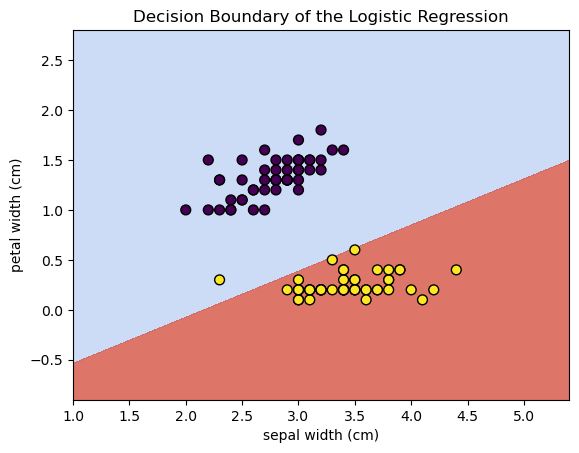

In [31]:
# so for for a threshold of 0.8 for example we get
plot_decision_boundary(feature_a = X['sepal width (cm)'],
                       feature_b = X['petal width (cm)'],
                       target = y, 
                       threshold = 0.8)

/Users/simaonovais/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


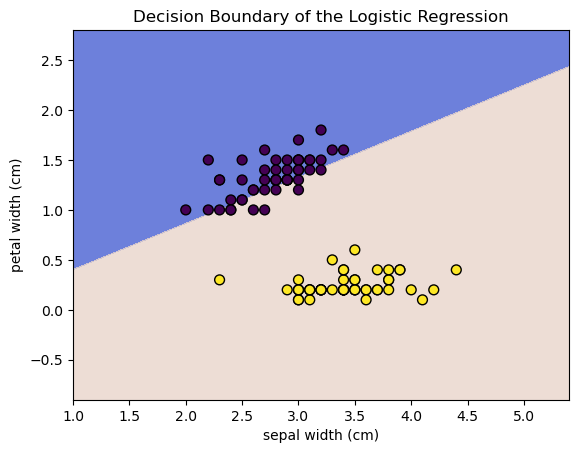

In [32]:
# so for for a threshold of 0.1 for example we get
plot_decision_boundary(feature_a = X['sepal width (cm)'],
                       feature_b = X['petal width (cm)'],
                       target = y, 
                       threshold = 0.1)

And that's it, you've reached the end of the lesson!

![](../media/7yvj5n.jpg)